In [1]:
import pymysql
import geopandas as gpd
from shapely.geometry import Point, Polygon
import math
import json
import sys



In [2]:
# connect to localhost MySQL server
db = pymysql.connect(host='localhost', user='kevin', passwd='kevin', db='sidewalk_data', autocommit=True)
cursor = db.cursor()
cursor.execute("DROP TABLE IF EXISTS crime")
sql_command = '''
    CREATE TABLE crime (id INT PRIMARY KEY NOT NULL, type CHAR(30) NOT NULL, full_time CHAR(19) NOT NULL, 
                        year INT NOT NULL, month INT NOT NULL, hour INT NOT NULL, location CHAR(60) NOT NULL, 
                        sdw_id CHAR(10) NOT NULL);
'''
cursor.execute(sql_command)

# load sidewalk id dataset
try:
    sidewalk_id_data = gpd.read_file('Sidewalks.shp')
except:
    sys.exit('Cannot locate the shapefiles. Make sure you have 5 of them in the same folder. See info on top.')
# load dataset of interest (in json)
try:
    imported_data = json.load(open('crime.json'))
except:
    sys.exit('Cannot locate the json files that contains info to be matched to ID\'s')



In [5]:
# center of city
center_coord = [-122.329237, 47.610541]

# divide a circle into 16 equal pieces
divided_conversion_coord = []
for i in range(0, 16): # 0 ~ 15
    divided_conversion_coord.append([math.cos(math.radians(22.5 * i)), math.sin(math.radians(22.5 * i))])

radius = 125 # km
divided_region = []
for i in range(0, 15): # 0 1, 1 2, ..., 14 15
    divided_region.append(
        Polygon([center_coord,
                 [center_coord[0] + divided_conversion_coord[i][0] * radius * 180 / (math.pi * 6367 * math.cos(center_coord[1])),
                  center_coord[1] + divided_conversion_coord[i][1] * radius * 180 / (math.pi * 6367)],
                 [center_coord[0] + divided_conversion_coord[i+1][0] * radius * 180 / (math.pi * 6367 * math.cos(center_coord[1])),
                  center_coord[1] + divided_conversion_coord[i+1][1] * radius * 180 / (math.pi * 6367)]]))
# 15 0
divided_region.append(
    Polygon([center_coord,
             [center_coord[0] + divided_conversion_coord[15][0] * radius * 180 / (math.pi * 6367 * math.cos(center_coord[1])),
              center_coord[1] + divided_conversion_coord[15][1] * radius * 180 / (math.pi * 6367)],
             [center_coord[0] + divided_conversion_coord[0][0] * radius * 180 / (math.pi * 6367 * math.cos(center_coord[1])),
              center_coord[1] + divided_conversion_coord[0][1] * radius * 180 / (math.pi * 6367)]]))

# each entry correspond to a list of all data in that section of circle
divided_sidewalk_id_data = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]];
for i in range(0, sidewalk_id_data.UNITID.count()):
    if sidewalk_id_data.geometry[i] is not None:
        for j in range(0, 16):
            if divided_region[j].intersects(sidewalk_id_data.geometry[i]):
                divided_sidewalk_id_data[j].append(i)

divided_sidewalk_id_datlen(divided_sidewalk_id_data[region_index])a


[[251,
  274,
  276,
  277,
  294,
  433,
  434,
  469,
  661,
  662,
  693,
  733,
  753,
  755,
  819,
  1085,
  1086,
  1087,
  1088,
  1093,
  1463,
  1473,
  1549,
  1553,
  1568,
  1571,
  1572,
  1574,
  1575,
  1612,
  1728,
  1731,
  1732,
  1734,
  1736,
  1738,
  1743,
  1748,
  1766,
  1809,
  1810,
  1813,
  1828,
  1843,
  1851,
  1887,
  2149,
  2163,
  2164,
  2313,
  2314,
  2317,
  2319,
  2473,
  2502,
  2582,
  2583,
  2838,
  2872,
  2893,
  2898,
  2901,
  2906,
  3737,
  4238,
  4239,
  4241,
  4257,
  4259,
  4279,
  4282,
  4283,
  4289,
  4291,
  4292,
  4296,
  4433,
  4436,
  4437,
  4439,
  4442,
  5251,
  5287,
  5288,
  5332,
  5333,
  5334,
  5335,
  6016,
  6019,
  6020,
  6028,
  6124,
  6404,
  6413,
  6439,
  6477,
  6570,
  6591,
  6808,
  6809,
  6811,
  6812,
  6814,
  6843,
  7060,
  7077,
  7087,
  7094,
  7169,
  7198,
  7217,
  7254,
  7258,
  7272,
  7403,
  7404,
  7405,
  7407,
  7408,
  7409,
  7410,
  7411,
  7413,
  7414,
  7415,
  7416,

In [13]:
(divided_sidewalk_id_data[9])

[130,
 137,
 138,
 140,
 170,
 191,
 479,
 513,
 527,
 531,
 534,
 544,
 551,
 553,
 555,
 556,
 558,
 565,
 569,
 573,
 575,
 576,
 579,
 580,
 581,
 583,
 584,
 585,
 586,
 589,
 590,
 592,
 610,
 1226,
 1258,
 1259,
 1295,
 1301,
 1302,
 1328,
 1329,
 1332,
 1336,
 1337,
 1421,
 1471,
 1510,
 1511,
 1650,
 1660,
 1663,
 1677,
 1678,
 1680,
 1684,
 1688,
 1694,
 1932,
 1936,
 1937,
 1940,
 1941,
 1942,
 1943,
 1945,
 1946,
 1949,
 1956,
 1957,
 1959,
 1961,
 1963,
 1966,
 1973,
 1988,
 1991,
 2008,
 2041,
 2275,
 2453,
 2599,
 2603,
 2605,
 2606,
 2607,
 2619,
 2625,
 2628,
 2630,
 2633,
 2634,
 2635,
 2637,
 2640,
 2642,
 2644,
 2645,
 2646,
 2662,
 2680,
 2681,
 2682,
 2684,
 2689,
 2874,
 2875,
 3182,
 3183,
 3219,
 3220,
 3227,
 3263,
 3335,
 3693,
 3854,
 3857,
 3860,
 3862,
 3863,
 3864,
 3867,
 3872,
 3873,
 3874,
 3875,
 3876,
 3882,
 3888,
 3889,
 3891,
 3892,
 3893,
 3894,
 3895,
 3896,
 3897,
 3900,
 3901,
 4027,
 4037,
 4045,
 4048,
 4052,
 4057,
 4061,
 4066,
 4067,
 406

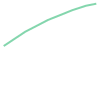

In [7]:
sidewalk_id_data.geometry[0]

In [ ]:
# for each entry in import_data
for i in range(0 , len(imported_data['data'])):
    long = float(imported_data['data'][i][22])
    lat = float(imported_data['data'][i][23])
    point = Point(long, lat)

    # which region is this point in?
    for q in range(0, 16):
        if divided_region[q].intersects(point):
            region_index = q
            break

    # code to match sidewalk id
    sqrt2 = math.sqrt(2)
    conversion_coord = [[1, 0], [1 / sqrt2, -1 / sqrt2], [0, -1], [-1 / sqrt2, -1 / sqrt2], [-1, 0],
                        [-1 / sqrt2, 1 / sqrt2], [0, 1], [1 / sqrt2, 1 / sqrt2]]

    radius_unit = 0.005  # if i = 1, radius = 5 m or 0.005 km

    # for all the radius
    for k in range(1, 21):  # 5 meters to 100 meters
        # creates a list to store the coordinates of polygon of this point with the radius given
        polygon_list = []
        # for all the directions
        for j in range(0, len(conversion_coord)):
            point_long = long + conversion_coord[j][0] * radius_unit * k * 180 / (math.pi * 6367 * math.cos(lat))
            point_lat = lat + conversion_coord[j][1] * radius_unit * k * 180 / (math.pi * 6367)
            polygon_list.append([point_long, point_lat])
        # creates the polygon
        point = Polygon(polygon_list)
        result = []

        for r in range(0, len(divided_sidewalk_id_data[region_index])):
            if point.intersects(sidewalk_id_data.geometry[divided_sidewalk_id_data[r]]):
                result.append(sidewalk_id_data.UNITID[divided_sidewalk_id_data[r]])
        # old code below:
        '''
        for m in range(0, sidewalk_id_data.UNITID.count()):
            if sidewalk_id_data.geometry[m] is not None:
                if point.intersects(sidewalk_id_data.geometry[m]):
                    result.append(sidewalk_id_data.UNITID[m])
        '''
        # in the case (which is quite often) that the coordinates given is in the middle of the street, both sidewalk
        # segments on the side would be equally likely to be included. To avoid messing up the sidewalk ID field in
        # database, select the first id by default. (This won't matter too much later on in the dashboard as we are
        # counting the number of incidents within a given region)
        if result:
            break
    if result:
        sql_command = (
                      'INSERT INTO crime (id, type, full_time, year, month, hour, location, sdw_id) ' +
                      'VALUES (' + str(i + 1) + ', \'' + imported_data['data'][i][14] + '\', \'' + imported_data['data'][i][16] +
                      '\', ' + imported_data['data'][i][16][0:4] + ', ' + imported_data['data'][i][16][5:7] + ', '
                      + imported_data['data'][i][16][11:13] + ', \'' + imported_data['data'][i][18] + '\', \'' + result[0] + '\');'
                      )
        print(sql_command)
        cursor.execute(sql_command)
cursor.close()
db.close()


In [14]:
len(imported_data['data'])

297795